In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../data/train.csv', index_col=0)

In [3]:
print(df.columns)
print(df.shape)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')
(891, 11)


In [4]:
df.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
868,0,1,"Roebling, Mr. Washington Augustus II",male,31.00,0,0,PC 17590,50.4958,A24,S
307,1,1,"Fleming, Miss. Margaret",female,NaN,0,0,17421,110.8833,NaN,C
382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.00,0,2,2653,15.7417,NaN,C
840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C
306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S


In [5]:
# The age column has nas, but they don't seem special at first sight.
# I'll fill them with the median

df[df['Age'].isnull()].sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
670,1,1,"Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)",female,NaN,1,0,19996,52.00,C126,S
512,0,3,"Webber, Mr. James",male,NaN,0,0,SOTON/OQ 3101316,8.05,NaN,S
432,1,3,"Thorneycroft, Mrs. Percival (Florence Kate White)",female,NaN,1,0,376564,16.10,NaN,S
761,0,3,"Garfirth, Mr. John",male,NaN,0,0,358585,14.50,NaN,S
257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,NaN,0,0,PC 17585,79.20,NaN,C


In [6]:
# Substitute missing ages with the median (28)

age = df['Age'][:]
median_age = age.median()
age[age.isnull()] = median_age

df2 = df[:]
df2['Age'] = age

In [7]:
# Encode cabin as 'data present' vs 'absent'
df2['Cabin'] = ~df2['Cabin'].isnull()

In [8]:
discrete_columns = ['Pclass','Sex', 'Cabin', 'Embarked']
dummies = []

# Workaround to get pandas to behave as I want
for column in discrete_columns:
    
    these_dummies = pd.get_dummies(df2[column], prefix=column, drop_first=True)
    dummies.append(these_dummies)
    
discrete = pd.concat(dummies, axis=1)

In [9]:
continuous_columns = ['Age', 'Fare']

continuous = df2[continuous_columns]

continuous_normalized = (continuous - continuous.mean()) / (continuous.max() - continuous.min())

In [10]:
features = pd.concat([discrete, continuous_normalized], axis=1)

In [11]:
full = pd.concat([features, df2['Survived']], axis=1)

train = full.sample(frac=.6)
rest = full.ix[full.index.difference(train.index)]
test = rest.sample(frac=.5)
cv = rest.ix[rest.index.difference(test.index)]

In [12]:
print(train.shape)
print(test.shape)
print(cv.shape)

(535, 9)
(178, 9)
(178, 9)


In [13]:
from sklearn.ensemble.forest import RandomForestClassifier

features = train.columns[:-1]

forest = RandomForestClassifier()
model = forest.fit(train[features], train['Survived'])

In [14]:
prob_preds = model.predict_proba(test[features])

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score

roc = roc_curve(test['Survived'], prob_preds[:,1])
roc_auc_score(test['Survived'], prob_preds[:,1])

0.83665735939369767

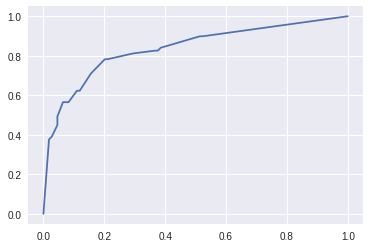

In [16]:
plt.plot(roc[0],roc[1])